## Libraries

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

## Dataset

In [76]:
df = pd.read_csv("data.csv");

### Data Description

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170653 entries, 4BJqT0PrAfrxzMOxytFOIz to 7HmnJHfs0BkFzX4x8j0hkl
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   instrumentalness  170653 non-null  float64
 9   key               170653 non-null  int64  
 10  liveness          170653 non-null  float64
 11  loudness          170653 non-null  float64
 12  mode              170653 non-null  int64  
 13  name              170653 non-null  object 
 14  popularity        170653 non-null  int64  
 15  speechiness       170653 non-null  f

In [77]:
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [70]:
df.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


## Data Pre-Processing

### Removing Null values

In [71]:
df.dropna(inplace=True)

### Setting 'id' column as Index

In [72]:
df.set_index(df['id'], inplace=True)

### Dropping redundant columns

In [73]:
df.drop(['release_date', 'id'], axis=1, inplace=True)
df

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo
id,,,,,,,,,,,,,,,,,
4BJqT0PrAfrxzMOxytFOIz,0.0594,1921,0.98200,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,0.0366,80.954
7xPhfUan2yNtyFG0cUWkt8,0.9630,1921,0.73200,['Dennis Day'],0.819,180533,0.341,0,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,5,0.4150,60.936
1o6I8BglA6ylDMrIELygv1,0.0394,1921,0.96100,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,0.913000,3,0.1010,-14.850,1,Gati Bali,5,0.0339,110.339
3ftBPsC5vPBKxYSee08FDH,0.1650,1921,0.96700,['Frank Parker'],0.275,210000,0.309,0,0.000028,5,0.3810,-9.316,1,Danny Boy,3,0.0354,100.109
4d6HGyGT8e121BsdKmw9v6,0.2530,1921,0.95700,['Phil Regan'],0.418,166693,0.193,0,0.000002,3,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,0.0380,101.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0KkIkfsLEJbrcIhYsCL7L5,0.6080,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0.000289,7,0.0822,-3.702,1,China,72,0.0881,105.029
0OStKKAuXlxA0fMH54Qs6E,0.7340,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,0.0605,137.936
4BZXVFYCb76Q0Klojq4piV,0.6370,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,0.000009,4,0.2580,-2.226,0,AYA,76,0.0809,91.688


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170653 entries, 4BJqT0PrAfrxzMOxytFOIz to 7HmnJHfs0BkFzX4x8j0hkl
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   instrumentalness  170653 non-null  float64
 9   key               170653 non-null  int64  
 10  liveness          170653 non-null  float64
 11  loudness          170653 non-null  float64
 12  mode              170653 non-null  int64  
 13  name              170653 non-null  object 
 14  popularity        170653 non-null  int64  
 15  speechiness       170653 non-null  f

## Data Standardisation

### Splitting Continuous Data

In [38]:
df_float = df.loc[:, df.dtypes == np.float64]
df_float

,valence,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo
id,,,,,,,,,
4BJqT0PrAfrxzMOxytFOIz,0.0594,0.98200,0.279,0.211,0.878000,0.6650,-20.096,0.0366,80.954
7xPhfUan2yNtyFG0cUWkt8,0.9630,0.73200,0.819,0.341,0.000000,0.1600,-12.441,0.4150,60.936
1o6I8BglA6ylDMrIELygv1,0.0394,0.96100,0.328,0.166,0.913000,0.1010,-14.850,0.0339,110.339
3ftBPsC5vPBKxYSee08FDH,0.1650,0.96700,0.275,0.309,0.000028,0.3810,-9.316,0.0354,100.109
4d6HGyGT8e121BsdKmw9v6,0.2530,0.95700,0.418,0.193,0.000002,0.2290,-10.096,0.0380,101.665
...,...,...,...,...,...,...,...,...,...
0KkIkfsLEJbrcIhYsCL7L5,0.6080,0.08460,0.786,0.808,0.000289,0.0822,-3.702,0.0881,105.029
0OStKKAuXlxA0fMH54Qs6E,0.7340,0.20600,0.717,0.753,0.000000,0.1010,-6.020,0.0605,137.936
4BZXVFYCb76Q0Klojq4piV,0.6370,0.10100,0.634,0.858,0.000009,0.2580,-2.226,0.0809,91.688


### Standardising Continuous Data

In [40]:
standard_float = scale(df_float)
df_float_std = pd.DataFrame(standard_float, columns=df_float.columns, index=df.index)
df_float_std

,valence,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo
id,,,,,,,,,
4BJqT0PrAfrxzMOxytFOIz,-1.782825,1.276187,-1.467013,-1.013988,2.268102,2.626719,-1.514237,-0.379706,-1.169307
7xPhfUan2yNtyFG0cUWkt8,1.650688,0.611347,1.598779,-0.528270,-0.532771,-0.262229,-0.170766,1.945481,-1.821180
1o6I8BglA6ylDMrIELygv1,-1.858821,1.220340,-1.188820,-1.182122,2.379754,-0.599749,-0.593551,-0.396297,-0.212404
3ftBPsC5vPBKxYSee08FDH,-1.381564,1.236296,-1.489722,-0.647832,-0.532682,1.002043,0.377680,-0.387080,-0.545537
4d6HGyGT8e121BsdKmw9v6,-1.047180,1.209703,-0.677855,-1.081242,-0.532765,0.132499,0.240788,-0.371104,-0.494867
...,...,...,...,...,...,...,...,...,...
0KkIkfsLEJbrcIhYsCL7L5,0.301754,-1.110321,1.411425,1.216579,-0.531849,-0.707298,1.362950,-0.063250,-0.385320
0OStKKAuXlxA0fMH54Qs6E,0.780531,-0.787475,1.019685,1.011083,-0.532771,-0.599749,0.956136,-0.232846,0.686274
4BZXVFYCb76Q0Klojq4piV,0.411949,-1.066708,0.548461,1.403394,-0.532743,0.298399,1.621992,-0.107492,-0.819761


### Visualising Standardised Data

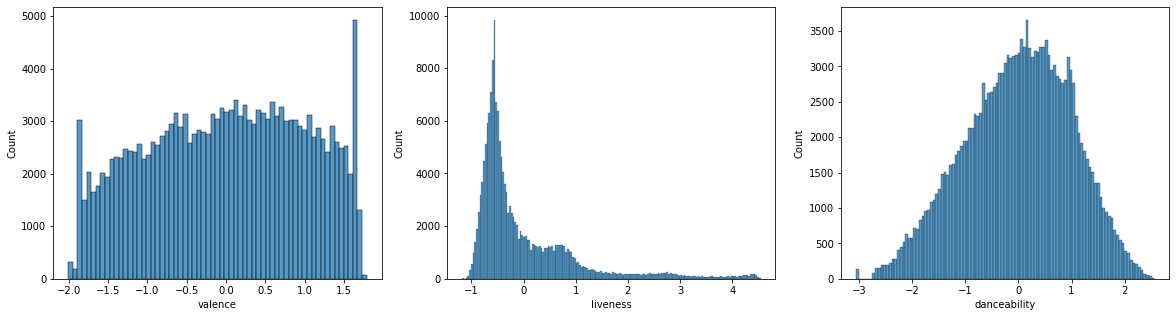

In [41]:
fig, axs = plt.subplots(ncols=3)
fig.set_size_inches(20, 5)
sns.histplot(df_float_std['valence'], ax=axs[0])
sns.histplot(df_float_std['liveness'], ax=axs[1])
sns.histplot(df_float_std['danceability'], ax=axs[2])


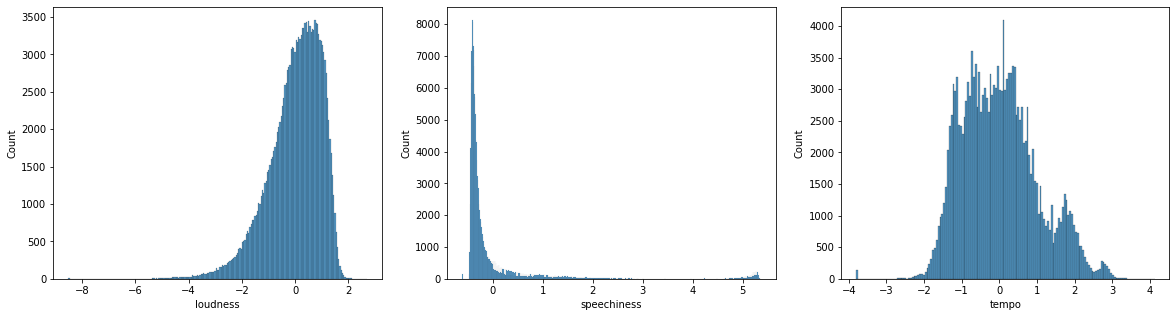

In [42]:
fig, axs = plt.subplots(ncols=3)
fig.set_size_inches(20, 5)
sns.histplot(df_float_std['loudness'], ax=axs[0])
sns.histplot(df_float_std['speechiness'], ax=axs[1])
sns.histplot(df_float_std['tempo'], ax=axs[2])

### Splitting Discrete Data

In [65]:
df_int = df.loc[:, df.dtypes == np.int64]
df_int

,year,duration_ms,explicit,key,mode,popularity
id,,,,,,
4BJqT0PrAfrxzMOxytFOIz,1921,831667,0,10,1,4
7xPhfUan2yNtyFG0cUWkt8,1921,180533,0,7,1,5
1o6I8BglA6ylDMrIELygv1,1921,500062,0,3,1,5
3ftBPsC5vPBKxYSee08FDH,1921,210000,0,5,1,3
4d6HGyGT8e121BsdKmw9v6,1921,166693,0,3,1,2
...,...,...,...,...,...,...
0KkIkfsLEJbrcIhYsCL7L5,2020,301714,0,7,1,72
0OStKKAuXlxA0fMH54Qs6E,2020,150654,0,7,1,68
4BZXVFYCb76Q0Klojq4piV,2020,211280,0,4,0,76


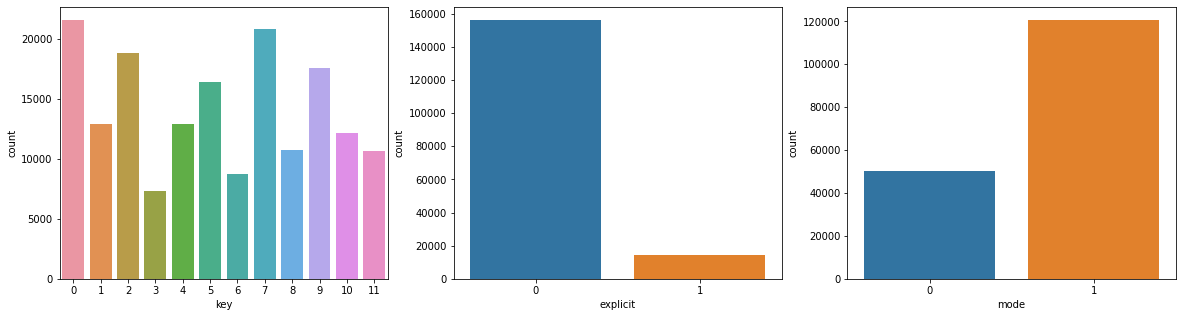

In [78]:
fig, axs = plt.subplots(ncols=3)
fig.set_size_inches(20, 5)
sns.countplot(x=df_int['key'], ax=axs[0])
sns.countplot(x=df_int['explicit'], ax=axs[1])
sns.countplot(x=df_int['mode'], ax=axs[2])

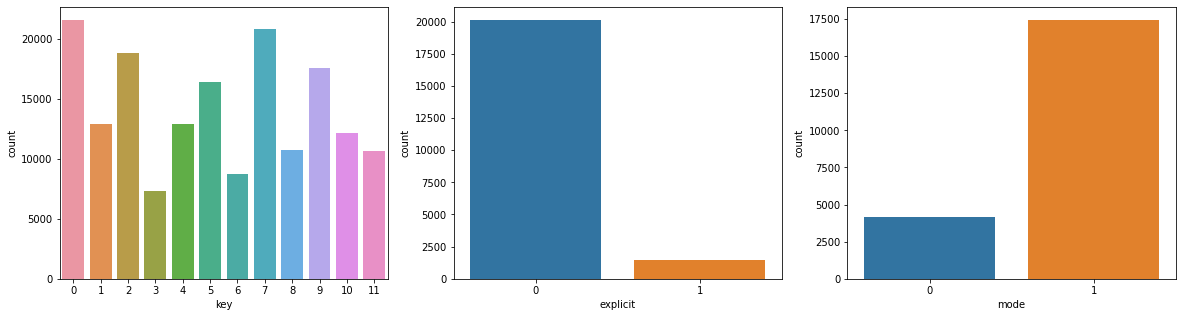

In [79]:
fig, axs = plt.subplots(ncols=3)
fig.set_size_inches(20, 5)
sns.countplot(x=df_int['key'], ax=axs[0])
sns.countplot(x=df_int[df_int['key'] == 0]['explicit'], ax=axs[1])
sns.countplot(x=df_int[df_int['key'] == 0]['mode'], ax=axs[2])

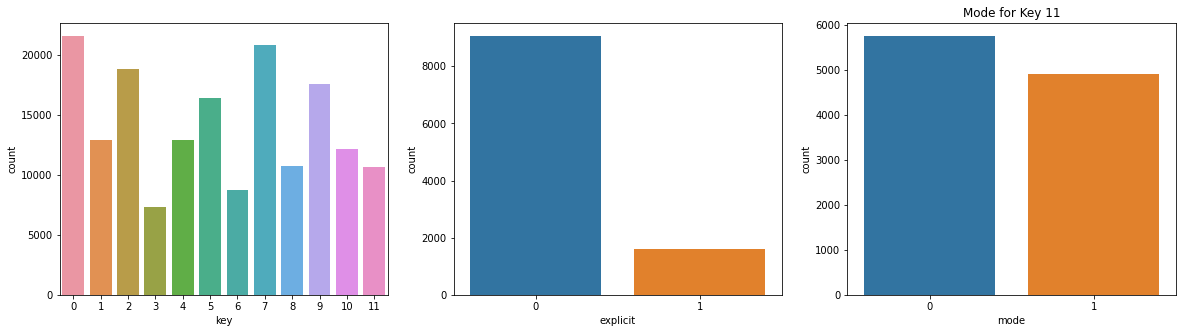

In [93]:
fig, axs = plt.subplots(ncols=3)
fig.set_size_inches(20, 5)
sns.countplot(x=df_int['key'], ax=axs[0])
sns.countplot(x=df_int[df_int['key'] == 11]['explicit'], ax=axs[1])
plt.title('Mode for Key 11')
sns.countplot(x=df_int[df_int['key'] == 11]['mode'], ax=axs[2])

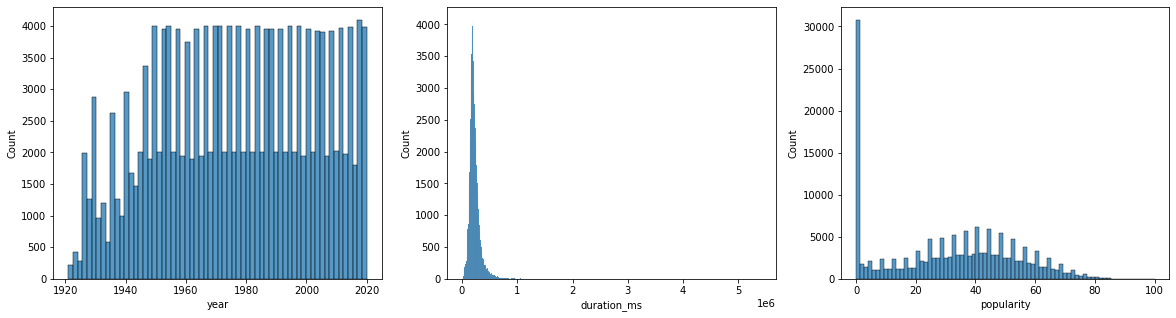

In [44]:
fig, axs = plt.subplots(ncols=3)
fig.set_size_inches(20, 5)
sns.histplot(df_int['year'], ax=axs[0])
sns.histplot(df_int['duration_ms'], ax=axs[1])
sns.histplot(df_int['popularity'], ax=axs[2])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


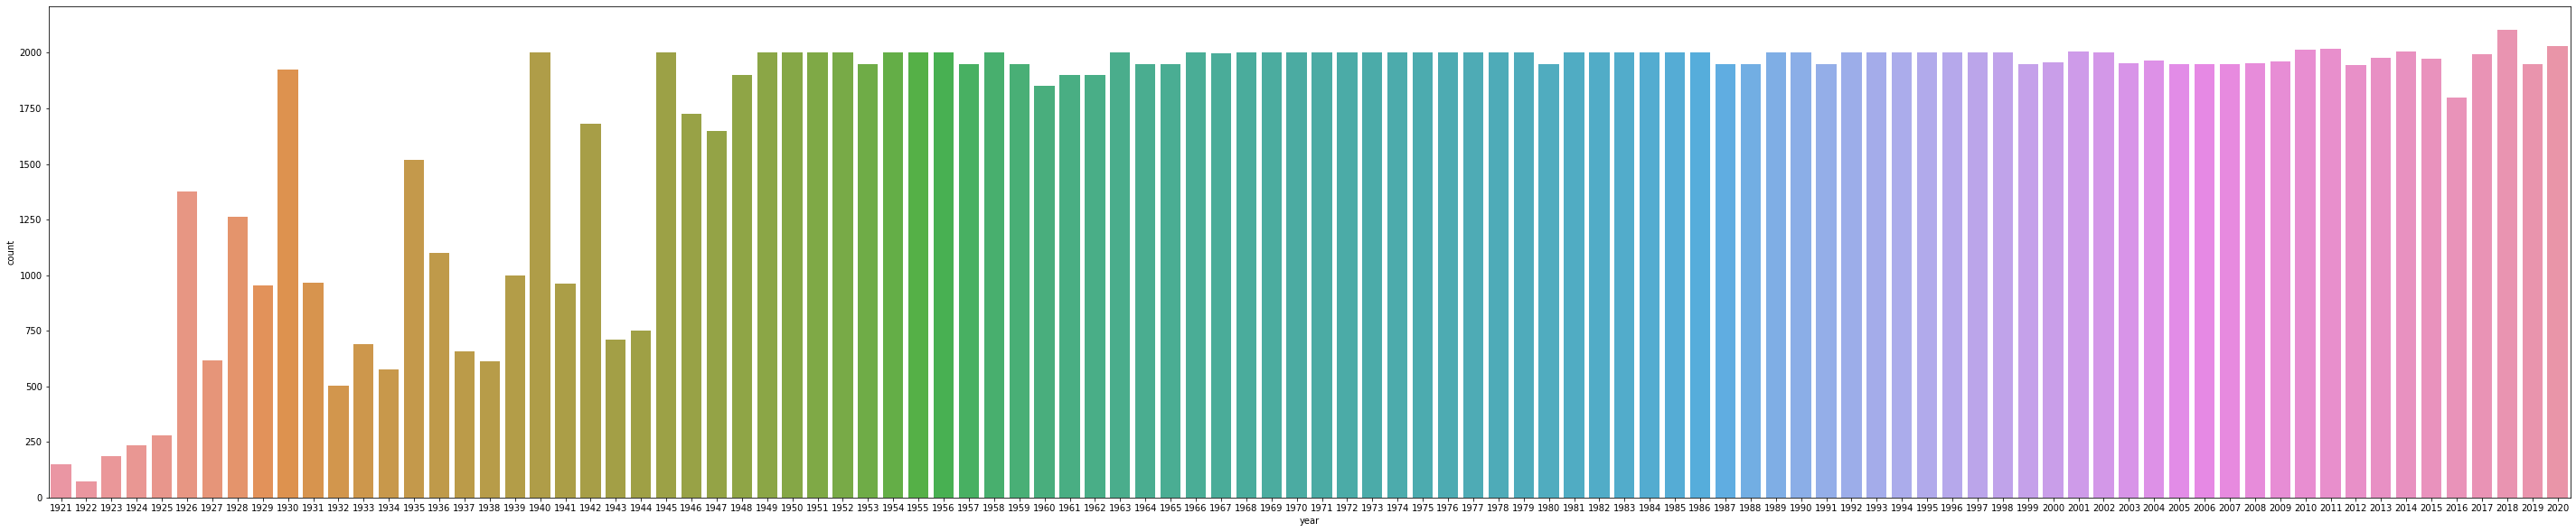

In [64]:
fig, axs = plt.subplots()
fig.set_size_inches(50, 10)
sns.countplot(df_int['year'])

In [46]:
df_int['year'].unique()

array([1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931,
       1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942,
       1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953,
       1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964,
       1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020])

### Splitting Categorical Data

In [47]:
df_cat = df.loc[:, df.dtypes == 'object']
df_cat

,artists,name
id,,
4BJqT0PrAfrxzMOxytFOIz,"['Sergei Rachmaninoff', 'James Levine', 'Berli...","Piano Concerto No. 3 in D Minor, Op. 30: III. ..."
7xPhfUan2yNtyFG0cUWkt8,['Dennis Day'],Clancy Lowered the Boom
1o6I8BglA6ylDMrIELygv1,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,Gati Bali
3ftBPsC5vPBKxYSee08FDH,['Frank Parker'],Danny Boy
4d6HGyGT8e121BsdKmw9v6,['Phil Regan'],When Irish Eyes Are Smiling
...,...,...
0KkIkfsLEJbrcIhYsCL7L5,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",China
0OStKKAuXlxA0fMH54Qs6E,['Ashnikko'],Halloweenie III: Seven Days
4BZXVFYCb76Q0Klojq4piV,['MAMAMOO'],AYA


### Merging all Data

In [48]:
df_std = pd.concat([df_float_std, df_int, df_cat], axis=1)

df_std

,valence,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,year,duration_ms,explicit,key,mode,popularity,artists,name
id,,,,,,,,,,,,,,,,,
4BJqT0PrAfrxzMOxytFOIz,-1.782825,1.276187,-1.467013,-1.013988,2.268102,2.626719,-1.514237,-0.379706,-1.169307,1921,831667,0,10,1,4,"['Sergei Rachmaninoff', 'James Levine', 'Berli...","Piano Concerto No. 3 in D Minor, Op. 30: III. ..."
7xPhfUan2yNtyFG0cUWkt8,1.650688,0.611347,1.598779,-0.528270,-0.532771,-0.262229,-0.170766,1.945481,-1.821180,1921,180533,0,7,1,5,['Dennis Day'],Clancy Lowered the Boom
1o6I8BglA6ylDMrIELygv1,-1.858821,1.220340,-1.188820,-1.182122,2.379754,-0.599749,-0.593551,-0.396297,-0.212404,1921,500062,0,3,1,5,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,Gati Bali
3ftBPsC5vPBKxYSee08FDH,-1.381564,1.236296,-1.489722,-0.647832,-0.532682,1.002043,0.377680,-0.387080,-0.545537,1921,210000,0,5,1,3,['Frank Parker'],Danny Boy
4d6HGyGT8e121BsdKmw9v6,-1.047180,1.209703,-0.677855,-1.081242,-0.532765,0.132499,0.240788,-0.371104,-0.494867,1921,166693,0,3,1,2,['Phil Regan'],When Irish Eyes Are Smiling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0KkIkfsLEJbrcIhYsCL7L5,0.301754,-1.110321,1.411425,1.216579,-0.531849,-0.707298,1.362950,-0.063250,-0.385320,2020,301714,0,7,1,72,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",China
0OStKKAuXlxA0fMH54Qs6E,0.780531,-0.787475,1.019685,1.011083,-0.532771,-0.599749,0.956136,-0.232846,0.686274,2020,150654,0,7,1,68,['Ashnikko'],Halloweenie III: Seven Days
4BZXVFYCb76Q0Klojq4piV,0.411949,-1.066708,0.548461,1.403394,-0.532743,0.298399,1.621992,-0.107492,-0.819761,2020,211280,0,4,0,76,['MAMAMOO'],AYA


## Linear Regression

### Using a Sample Data

In [49]:
df_sample = df_std.sample(800)

## Train and Test Set Split

In [53]:
train_x, test_x, train_y, test_y = train_test_split(df_sample['energy'], df_sample['loudness'], test_size=1/8, random_state=0)

In [54]:
train_x = train_x.values.reshape(-1, 1)
train_y = train_y.values.reshape(-1, 1)
test_x = test_x.values.reshape(-1, 1)
test_y = test_y.values.reshape(-1, 1)

### Model training and Prediction

In [55]:
model = LinearRegression()
model = model.fit(train_x, train_y)
model.predict(test_x)

array([[-1.37401056],
       [-0.94439499],
       [ 0.2090934 ],
       [-0.8472901 ],
       [-0.3352825 ],
       [ 0.79760788],
       [-0.19992417],
       [-1.18421464],
       [ 0.30914086],
       [ 0.91531077],
       [ 0.61222582],
       [-0.19109645],
       [-0.132245  ],
       [-0.52360714],
       [ 1.26547689],
       [-0.05573812],
       [ 0.52689122],
       [ 0.83880389],
       [-0.06162327],
       [-0.49712398],
       [ 0.41213089],
       [-0.38530623],
       [-0.18521131],
       [ 0.37093488],
       [-0.68839119],
       [ 0.1767251 ],
       [-0.65308032],
       [ 0.88294248],
       [-1.33840544],
       [ 0.25323198],
       [-0.60599916],
       [-0.99736129],
       [-0.40296167],
       [-0.77961094],
       [-0.77372579],
       [ 0.84468904],
       [-1.300152  ],
       [-0.5059517 ],
       [-0.65896547],
       [-0.50300913],
       [ 0.71815842],
       [ 0.56220208],
       [-1.33252029],
       [-1.40632001],
       [-1.11800676],
       [-1

### Visualising Training Sample

Text(0, 0.5, 'loudness')

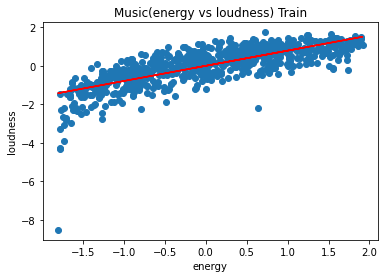

In [56]:
plt.scatter(train_x, train_y)
plt.plot(train_x, model.predict(train_x), color='red')
plt.title('Music(energy vs loudness) Train')
plt.xlabel('energy')
plt.ylabel('loudness')

### Visualising Testing Sample

Text(0, 0.5, 'loudness')

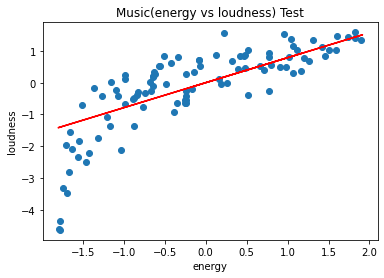

In [57]:
plt.scatter(test_x, test_y)
plt.plot(train_x, model.predict(train_x), color='red')
plt.title('Music(energy vs loudness) Test')
plt.xlabel('energy')
plt.ylabel('loudness')

## Other Visualisation

### Linear Relation between continuous attributes

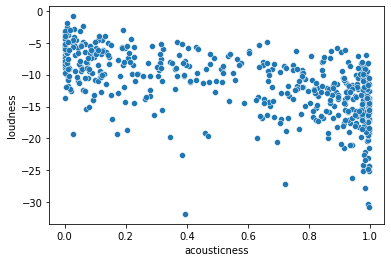

In [ ]:
s.scatterplot(data=df_sample, x=df_sample['acousticness'], y=df_sample['loudness'])

In [ ]:
len(df['artists'].unique())

9452

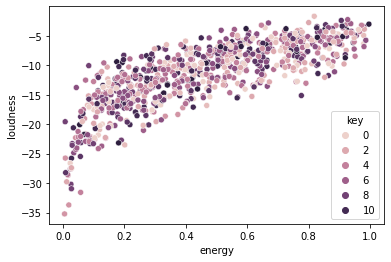

In [ ]:
sns.scatterplot(x=df_sample['energy'], y=df_sample['loudness'], hue=df_sample['key'], data=df_sample)

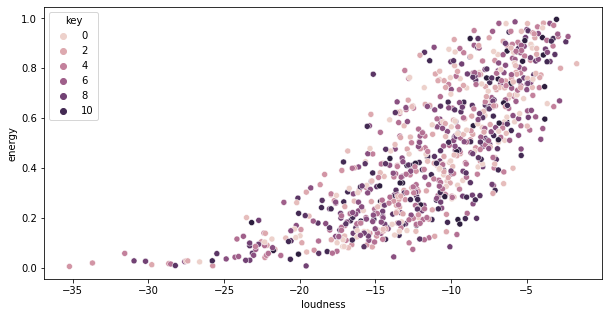

In [ ]:
fig, axs = plt.subplots()
fig.set_size_inches(10, 5)
sns.scatterplot(x=df_sample['loudness'], y=df_sample['energy'], hue=df_sample['key'], data=df_sample)

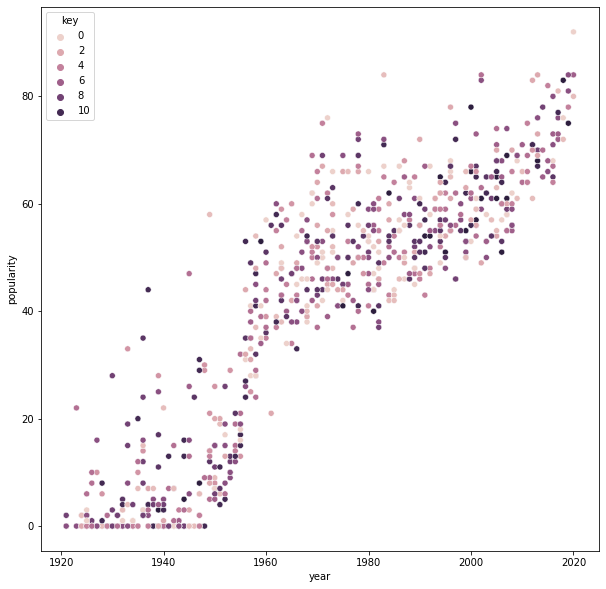

In [ ]:
fig, axs = plt.subplots()
fig.set_size_inches(10, 10)
sns.scatterplot(x=df_sample['year'], y=df_sample['popularity'], hue=df_sample['key'], data=df_sample)

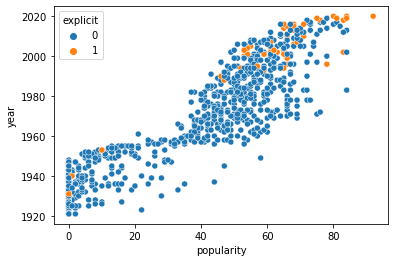

In [ ]:
sns.scatterplot(x=df_sample['popularity'], y=df_sample['year'], hue=df_sample['explicit'], data=df_sample)

In [ ]:
len(df['year'].unique())

100

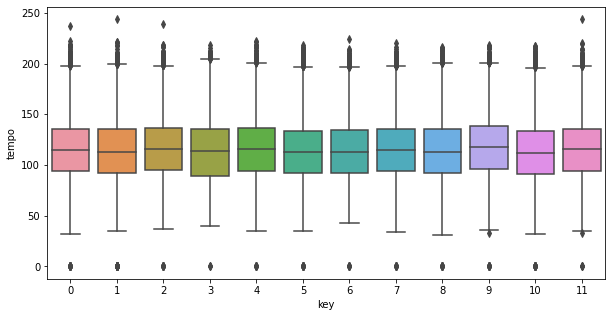

In [ ]:
fig, axs = plt.subplots()
fig.set_size_inches(10, 5)
sns.boxplot(x=df_std['key'], y=df_std['tempo'], data=df)